<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Kernel_Density_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV


In [2]:
def generate_data(seed=17):
    # Fix the seed to reproduce the results
    rand = np.random.RandomState(seed)
    x = []
    dat = rand.lognormal(0, 0.3, 1000)
    x = np.concatenate((x, dat))
    dat = rand.normal(3, 1, 1000)
    x = np.concatenate((x, dat))
    return x

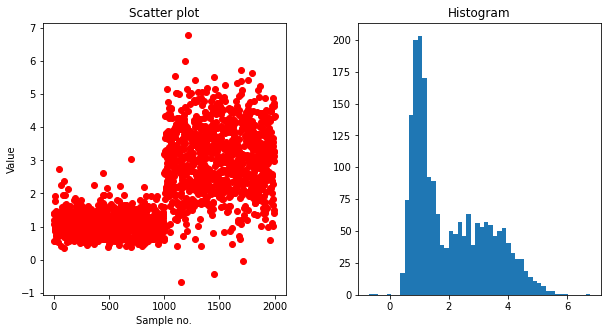

In [3]:
x_train = generate_data()[:, np.newaxis]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplot(121)
plt.scatter(np.arange(len(x_train)), x_train, c='red')
plt.xlabel('Sample no.')
plt.ylabel('Value')
plt.title('Scatter plot')
plt.subplot(122)
plt.hist(x_train, bins=50)
plt.title('Histogram')
fig.subplots_adjust(wspace=.3)
plt.show()

In [4]:
x_test = np.linspace(-1, 7, 2000)[:, np.newaxis]

In [5]:
model = KernelDensity()
model.fit(x_train)
log_dens = model.score_samples(x_test)

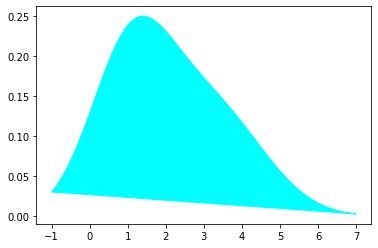

In [6]:
plt.fill(x_test, np.exp(log_dens), c='cyan')
plt.show()

Understanding the Bandwidth Parameter


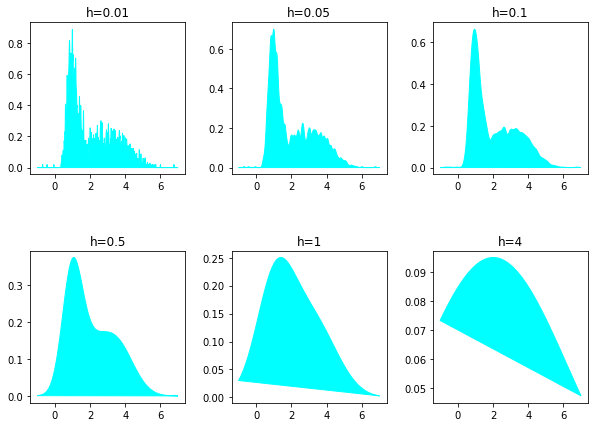

In [7]:
bandwidths = [0.01, 0.05, 0.1, 0.5, 1, 4]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for b, ind in zip(bandwidths, plt_ind):
    kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
    kde_model.fit(x_train)
    score = kde_model.score_samples(x_test)
    plt.subplot(ind)
    plt.fill(x_test, np.exp(score), c='cyan')
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()


Tuning the Bandwidth Parameter


In [8]:
bandwidth = np.arange(0.05, 2, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bandwidth': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

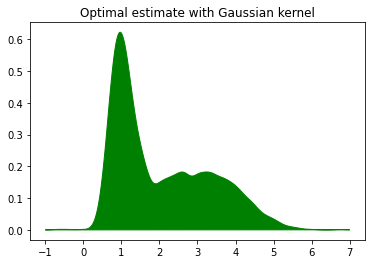

optimal bandwidth: 0.15


In [9]:
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test)
plt.fill(x_test, np.exp(log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))


Different Kernels for Density Estimation


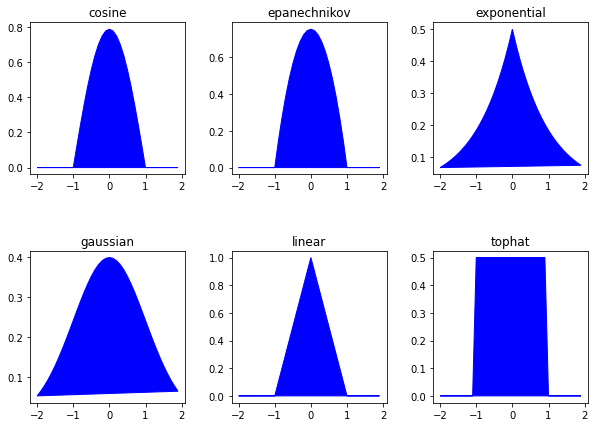

In [10]:
kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for k, ind in zip(kernels, plt_ind):
    kde_model = KernelDensity(kernel=k)
    kde_model.fit([[0]])
    score = kde_model.score_samples(np.arange(-2, 2, 0.1)[:, None])
    plt.subplot(ind)
    plt.fill(np.arange(-2, 2, 0.1)[:, None], np.exp(score), c='blue')
    plt.title(k)

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()


Experimenting With Different Kernels


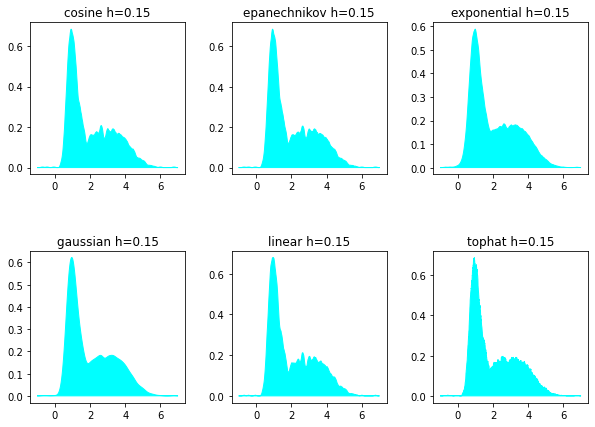

In [11]:
def my_scores(estimator, X):
    scores = estimator.score_samples(X)
    # Remove -inf
    scores = scores[scores != float('-inf')]
    # Return the mean values
    return np.mean(scores)

kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231
h_vals = np.arange(0.05, 1, .1)

for k, ind in zip(kernels, plt_ind):
    grid = GridSearchCV(KernelDensity(kernel=k),
                        {'bandwidth': h_vals},
                        scoring=my_scores)
    grid.fit(x_train)
    kde = grid.best_estimator_
    log_dens = kde.score_samples(x_test)
    plt.subplot(ind)
    plt.fill(x_test, np.exp(log_dens), c='cyan')
    plt.title(k + " h=" + "{:.2f}".format(kde.bandwidth))

fig.subplots_adjust(hspace=.5, wspace=.3)
plt.show()


The Final Optimized Model


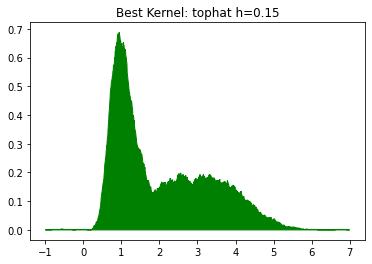

In [12]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': h_vals, 'kernel': kernels},
                    scoring=my_scores)
grid.fit(x_train)
best_kde = grid.best_estimator_
log_dens = best_kde.score_samples(x_test)
plt.fill(x_test, np.exp(log_dens), c='green')
plt.title("Best Kernel: " + best_kde.kernel+" h="+"{:.2f}".format(best_kde.bandwidth))
plt.show()